In [21]:
import spacy
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import gc

from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

## eda

In [15]:
# print the output fully
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv('./dataset/ClinNotes.csv')

In [6]:
df.columns, len(df)

(Index(['category', 'notes'], dtype='object'), 818)

In [7]:
df.head(2)

,category,notes
0,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
1,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...


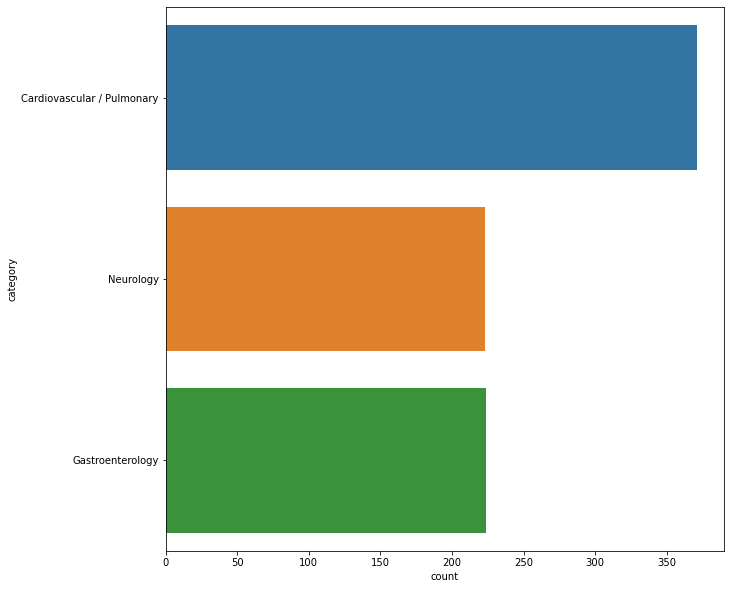

In [4]:
plt.figure(figsize=(10, 10))
sns.countplot(y='category', data=df)
plt.show()

### notes processing

In [8]:
# load spaCy
nlp = spacy.load("en_core_sci_lg")

In [9]:
df_processed = df.copy()

### spaCy preprocessing and tokenization

In [10]:
# process notes
# use spaCy to tokenize, extract the important medical terms
# then create string with that
def process_notes(note):
    words = []
    doc = nlp(note)
    for ent in doc.ents:
        words.append(ent.text)
    return ' '.join(words)

In [11]:
df_processed.notes = df_processed.notes.apply(process_notes)

In [16]:
# original
print(df.notes.iloc[0:1])

0    2-D M-MODE: , ,1.  Left atrial enlargement with left atrial diameter of 4.7 cm.,2.  Normal size right and left ventricle.,3.  Normal LV systolic function with left ventricular ejection fraction of 51%.,4.  Normal LV diastolic function.,5.  No pericardial effusion.,6.  Normal morphology of aortic valve, mitral valve, tricuspid valve, and pulmonary valve.,7.  PA systolic pressure is 36 mmHg.,DOPPLER: , ,1.  Mild mitral and tricuspid regurgitation.,2.  Trace aortic and pulmonary regurgitation.
Name: notes, dtype: object


In [17]:
# processed
print(df_processed.notes.iloc[0:1])

0    2-D Left atrial enlargement left atrial diameter cm.,2 Normal size right left ventricle.,3 Normal LV systolic function left ventricular ejection fraction Normal LV diastolic function.,5 No pericardial effusion.,6 Normal morphology aortic valve mitral valve tricuspid valve pulmonary valve.,7 PA systolic pressure mmHg.,DOPPLER Mild mitral tricuspid regurgitation.,2 Trace aortic pulmonary regurgitation
Name: notes, dtype: object


In [19]:
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english', ngram_range=(1, 3), max_df=0.75, min_df=5, use_idf=True, smooth_idf=True, sublinear_tf=True, max_features=1000)
tfIdfMat = vectorizer.fit_transform(df_processed.notes.tolist())
feature_names = sorted(vectorizer.get_feature_names())

/home/thivav/anaconda3/envs/tf_exam/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


/home/thivav/anaconda3/envs/tf_exam/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/thivav/anaconda3/envs/tf_exam/lib/python3.8/site-packages/sklearn/utils/validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


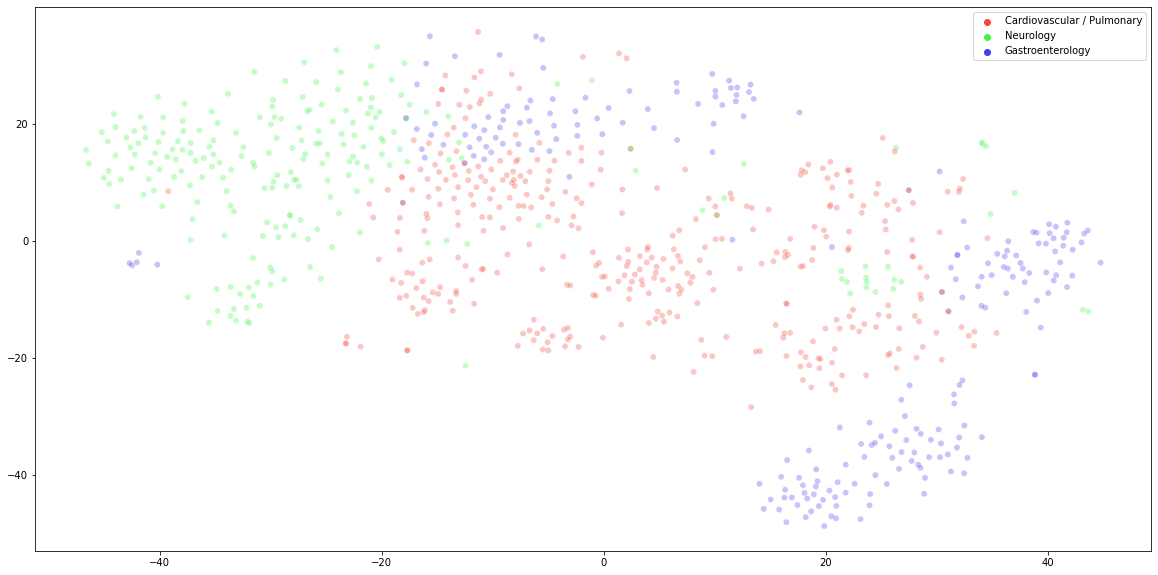

In [29]:
gc.collect()

tfIdfMatrix = tfIdfMat.todense()
labels = df_processed.category.tolist()
tsne_results = TSNE(n_components=2, init='random', random_state=0, perplexity=40).fit_transform(tfIdfMatrix)
plt.figure(figsize=(20, 10))
palette = sns.hls_palette(3, l=.6, s=.9)
sns.scatterplot(
    x=tsne_results[:, 0], y=tsne_results[:, 1],
    hue=labels,
    palette=palette,
    legend="full",
    alpha=0.3
)
plt.show()